In [4]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [6]:
tweets = pd.read_csv('/content/drive/MyDrive/yinka/tweets.csv')

In [7]:
tweets.head()

,id,Created At,Tweet,Screen Name,Location
0,1653452217632817154,2023-05-02 17:31:42+00:00,b'@Ugochuk79688061 @simon_ekpa @BiafraRGIE D w...,b'',NaN
1,1653452122656997379,2023-05-02 17:31:20+00:00,b'@WElighted @Mr_JAGs Fulani herdsmen destroy ...,"b'Onitsha, Nigeria'",NaN
2,1653445692449251328,2023-05-02 17:05:47+00:00,b'government and her security agencies for pro...,b'',NaN
3,1653444971104542722,2023-05-02 17:02:55+00:00,b'@BashirAhmaad @MBuhari Commissioning houses ...,b'Ukraine',NaN
4,1653437809674297347,2023-05-02 16:34:27+00:00,b'@ileribabalobi @pdauda Benue peeps will give...,"b'Lagos, Nigeria'",NaN


In [8]:
df = tweets[['id','Tweet','Screen Name']]

In [9]:
df.columns = ['id','tweet','location']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2208 non-null   int64 
 1   tweet     2208 non-null   object
 2   location  2208 non-null   object
dtypes: int64(1), object(2)
memory usage: 51.9+ KB


Using tweet preprocessor

In [11]:
import preprocessor as p

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import re

In [14]:
def clean_tweet(data):
  text = data['tweet']
  text = p.clean(text)
  text = re.sub(r"^b'", "", text)
  text = re.sub(r"\?|\_|\-|\!|\,|\...|\&|\:|\;|\'s|\(|\)|\.", '', text)
  text = re.sub(r"\\n", '', text)
  text = text.lower()
  return text

In [15]:
df['tweet'] = df.apply(clean_tweet, axis=1)

In [16]:
df.head()

,id,tweet,location
0,1653452217632817154,d way you dey tag fulani herdsmen dey do ur m...,b''
1,1653452122656997379,fulani herdsmen destroy our project site \xf0...,"b'Onitsha, Nigeria'"
2,1653445692449251328,government and her security agencies for prote...,b''
3,1653444971104542722,commissioning houses he knows nothing about w...,b'Ukraine'
4,1653437809674297347,benue peeps will give accounts of how they ne...,"b'Lagos, Nigeria'"


In [17]:
pattern = re.compile(r"^b'")

# apply the regex substitution to the 'text' column
df['location'] = df['location'].apply(lambda x: pattern.sub('', x))
df['location'] = df['location'].replace("'",'Nigeria')

In [18]:
df.head()

,id,tweet,location
0,1653452217632817154,d way you dey tag fulani herdsmen dey do ur m...,Nigeria
1,1653452122656997379,fulani herdsmen destroy our project site \xf0...,"Onitsha, Nigeria'"
2,1653445692449251328,government and her security agencies for prote...,Nigeria
3,1653444971104542722,commissioning houses he knows nothing about w...,Ukraine'
4,1653437809674297347,benue peeps will give accounts of how they ne...,"Lagos, Nigeria'"


In [19]:
df = df[['id','tweet']]

In [20]:
df.head()


,id,tweet
0,1653452217632817154,d way you dey tag fulani herdsmen dey do ur m...
1,1653452122656997379,fulani herdsmen destroy our project site \xf0...
2,1653445692449251328,government and her security agencies for prote...
3,1653444971104542722,commissioning houses he knows nothing about w...
4,1653437809674297347,benue peeps will give accounts of how they ne...


In [21]:
import nltk

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
df['tweet'] =df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 4]))

In [26]:
df.tweet.head()

0         fulani herdsmen movement informa\xe2\x80\xa6
1     fulani herdsmen destroy project \xf0\x9f\xa4\x94
2    government security agencies protecting lands ...
3    commissioning houses knows nothing around brot...
4    benue peeps accounts never problems herdsmen p...
Name: tweet, dtype: object

In [27]:
all_words = ' '.join([w for w in df['tweet']])

In [28]:
len(all_words)

145601

In [29]:
from wordcloud import WordCloud

In [30]:
xwords = pd.Series(['xe2','x80','xa6','xf0' ,'x9f','x99','x99t','xa3','xa4','xc2'])

In [31]:
banned_words = set(word.lower() for word in xwords)

In [32]:
def delete_banned_words(matchobj):
    word = matchobj.group(0)
    if word.lower() in banned_words:
        return ""
    else:
        return word

In [33]:
word_pattern = re.compile('\w+')

In [34]:
df['tweet'] = [word_pattern.sub(delete_banned_words,sentence) for sentence in df['tweet']]

In [35]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110,background_color = 'black').generate(all_words)

In [36]:

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
   
    wordcloud = WordCloud(
                      background_color=color,
                          width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Let us check the frequecies of word in the tweets

In [37]:
words = ' '.join(df['tweet'])

tokenize tweet

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
from nltk.tokenize import word_tokenize

# tokenize the words
tokens = word_tokenize(words)

In [40]:
tokens

['fulani',
 'herdsmen',
 'movement',
 'informa\\\\\\',
 'fulani',
 'herdsmen',
 'destroy',
 'project',
 '\\\\\\\\x94',
 'government',
 'security',
 'agencies',
 'protecting',
 'lands',
 'invading',
 'fulani',
 'terrorists',
 'nicknamed',
 'herd\\\\\\',
 'commissioning',
 'houses',
 'knows',
 'nothing',
 'around',
 'brothers',
 'fulani',
 'herdsmen',
 "'",
 'benue',
 'peeps',
 'accounts',
 'never',
 'problems',
 'herdsmen',
 'pm\\\\\\',
 'protect',
 'people',
 'slaughtered',
 'fulani',
 'herdsmeno',
 'nigeria',
 'government',
 'security',
 'agencies',
 'protecting',
 'lands',
 'invading',
 'fulani',
 'terrorists',
 'nickna\\\\\\',
 'people',
 'southern',
 'kaduna',
 'constantly',
 'attacked',
 'fulani',
 'herdsmennour',
 'people',
 '\\\\\\',
 'herdsmen',
 'related',
 'tweet',
 'condemns',
 'necessaryvery',
 'human',
 'would',
 'con\\\\\\',
 'eighteen',
 'christians',
 'killed',
 'others',
 'wounded',
 'predominantly',
 'christian',
 'villages',
 'plateau',
 'state',
 'niger\\\\\\',
 'is

In [41]:
unwanted_words = ['xe7x8fxe5x88xa9xe5xa7xac','xc2xa1nfidel','xc2xa1dxc2xa10t','x98x94x98x94',"'",'x94','b','b',"''",'','xa3i',"'m",'x98x81',"n't",'x87xacx87xa7','esn','\\\\\\', 'foreve\\\\\\', '\\xc2\\xa1d\\xc2\\xa10t','\\xc2\\xa1nfidel','th\\\\\\','m','\\\\\\\\xa3I','\\xe7\\\\x8f\\xe5\\x88\\xa9\\xe5\\xa7\\xac','\\\\\\x98\\x94\\\\\\x98\\x94']

# filter out unwanted words from the list of tokens using list comprehension
filtered_tokens = [word for word in tokens if word not in unwanted_words]

# print the filtered tokens
print(filtered_tokens)

['fulani', 'herdsmen', 'movement', 'informa\\\\\\', 'fulani', 'herdsmen', 'destroy', 'project', '\\\\\\\\x94', 'government', 'security', 'agencies', 'protecting', 'lands', 'invading', 'fulani', 'terrorists', 'nicknamed', 'herd\\\\\\', 'commissioning', 'houses', 'knows', 'nothing', 'around', 'brothers', 'fulani', 'herdsmen', 'benue', 'peeps', 'accounts', 'never', 'problems', 'herdsmen', 'pm\\\\\\', 'protect', 'people', 'slaughtered', 'fulani', 'herdsmeno', 'nigeria', 'government', 'security', 'agencies', 'protecting', 'lands', 'invading', 'fulani', 'terrorists', 'nickna\\\\\\', 'people', 'southern', 'kaduna', 'constantly', 'attacked', 'fulani', 'herdsmennour', 'people', 'herdsmen', 'related', 'tweet', 'condemns', 'necessaryvery', 'human', 'would', 'con\\\\\\', 'eighteen', 'christians', 'killed', 'others', 'wounded', 'predominantly', 'christian', 'villages', 'plateau', 'state', 'niger\\\\\\', 'iswap', 'kills', 'pastor', 'herdsmen', 'slaughter', 'christians', 'nigeria', 'herdsmen', 'kidna

In [42]:
clean_tokens = [word.replace('\\', '') for word in tokens]

In [43]:
clean_tokens

['fulani',
 'herdsmen',
 'movement',
 'informa',
 'fulani',
 'herdsmen',
 'destroy',
 'project',
 'x94',
 'government',
 'security',
 'agencies',
 'protecting',
 'lands',
 'invading',
 'fulani',
 'terrorists',
 'nicknamed',
 'herd',
 'commissioning',
 'houses',
 'knows',
 'nothing',
 'around',
 'brothers',
 'fulani',
 'herdsmen',
 "'",
 'benue',
 'peeps',
 'accounts',
 'never',
 'problems',
 'herdsmen',
 'pm',
 'protect',
 'people',
 'slaughtered',
 'fulani',
 'herdsmeno',
 'nigeria',
 'government',
 'security',
 'agencies',
 'protecting',
 'lands',
 'invading',
 'fulani',
 'terrorists',
 'nickna',
 'people',
 'southern',
 'kaduna',
 'constantly',
 'attacked',
 'fulani',
 'herdsmennour',
 'people',
 '',
 'herdsmen',
 'related',
 'tweet',
 'condemns',
 'necessaryvery',
 'human',
 'would',
 'con',
 'eighteen',
 'christians',
 'killed',
 'others',
 'wounded',
 'predominantly',
 'christian',
 'villages',
 'plateau',
 'state',
 'niger',
 'iswap',
 'kills',
 'pastor',
 'herdsmen',
 'slaughte

In [44]:
unwanted_words_new = ['xe7x8fxe5x88xa9xe5xa7xac','xc2xa1nfidel','xc2xa1dxc2xa10t','x98x94x98x94',"'",'x94','b','b',"''",'','xa3i',"'m",'x98x81',"n't",'x87xacx87xa7','esn','``','mo'," '","''",'ca',"n't",'th']

# filter out unwanted words from the list of tokens using list comprehension
filtered_tokens = [word for word in clean_tokens if word not in unwanted_words_new]

# print the filtered tokens
print(filtered_tokens)

['fulani', 'herdsmen', 'movement', 'informa', 'fulani', 'herdsmen', 'destroy', 'project', 'government', 'security', 'agencies', 'protecting', 'lands', 'invading', 'fulani', 'terrorists', 'nicknamed', 'herd', 'commissioning', 'houses', 'knows', 'nothing', 'around', 'brothers', 'fulani', 'herdsmen', 'benue', 'peeps', 'accounts', 'never', 'problems', 'herdsmen', 'pm', 'protect', 'people', 'slaughtered', 'fulani', 'herdsmeno', 'nigeria', 'government', 'security', 'agencies', 'protecting', 'lands', 'invading', 'fulani', 'terrorists', 'nickna', 'people', 'southern', 'kaduna', 'constantly', 'attacked', 'fulani', 'herdsmennour', 'people', 'herdsmen', 'related', 'tweet', 'condemns', 'necessaryvery', 'human', 'would', 'con', 'eighteen', 'christians', 'killed', 'others', 'wounded', 'predominantly', 'christian', 'villages', 'plateau', 'state', 'niger', 'iswap', 'kills', 'pastor', 'herdsmen', 'slaughter', 'christians', 'nigeria', 'herdsmen', 'kidnap', 'member', 'family', 'ix99ll', 'response', 'then

In [45]:
filtered_tokens = [word.lower() for word in filtered_tokens]

In [46]:
filtered_tokens

['fulani',
 'herdsmen',
 'movement',
 'informa',
 'fulani',
 'herdsmen',
 'destroy',
 'project',
 'government',
 'security',
 'agencies',
 'protecting',
 'lands',
 'invading',
 'fulani',
 'terrorists',
 'nicknamed',
 'herd',
 'commissioning',
 'houses',
 'knows',
 'nothing',
 'around',
 'brothers',
 'fulani',
 'herdsmen',
 'benue',
 'peeps',
 'accounts',
 'never',
 'problems',
 'herdsmen',
 'pm',
 'protect',
 'people',
 'slaughtered',
 'fulani',
 'herdsmeno',
 'nigeria',
 'government',
 'security',
 'agencies',
 'protecting',
 'lands',
 'invading',
 'fulani',
 'terrorists',
 'nickna',
 'people',
 'southern',
 'kaduna',
 'constantly',
 'attacked',
 'fulani',
 'herdsmennour',
 'people',
 'herdsmen',
 'related',
 'tweet',
 'condemns',
 'necessaryvery',
 'human',
 'would',
 'con',
 'eighteen',
 'christians',
 'killed',
 'others',
 'wounded',
 'predominantly',
 'christian',
 'villages',
 'plateau',
 'state',
 'niger',
 'iswap',
 'kills',
 'pastor',
 'herdsmen',
 'slaughter',
 'christians',


In [47]:
from nltk.probability import FreqDist

# create a frequency distribution of the tokens
freq_dist = FreqDist(filtered_tokens)


In [48]:
# create a dataframe from the frequency distribution
freq_df = pd.DataFrame(list(freq_dist.items()), columns=['Word', 'Frequency'])


In [49]:
# sort the dataframe by frequency in descending order
freq_df = freq_df.sort_values(by='Frequency', ascending=False)


In [50]:
freq_df

,Word,Frequency
1,herdsmen,1314
0,fulani,573
28,people,204
31,nigeria,193
184,haram,174
...,...,...
2301,succeeded,1
2302,killinghey,1
2303,sleep,1
2304,callee,1


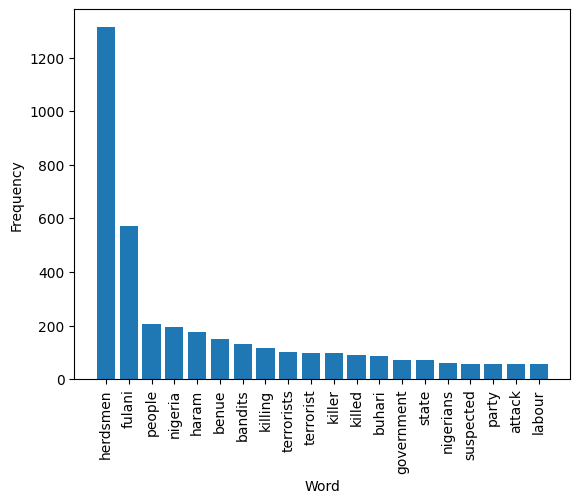

In [51]:
import matplotlib.pyplot as plt

# create a bar plot of the top 20 words by frequency
plt.bar(freq_df['Word'][:20], freq_df['Frequency'][:20])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

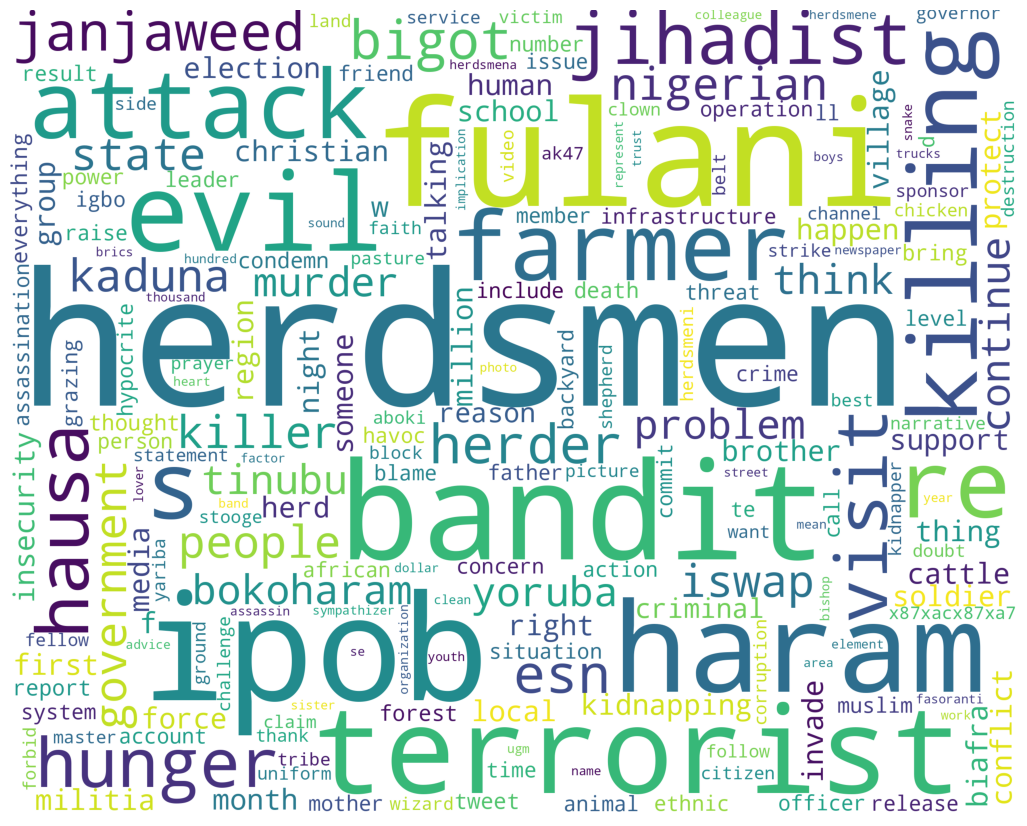

In [52]:
wordcloud_draw(freq_df['Word'],color = 'white')

Bigram of words and their frequencies

In [53]:
from collections import Counter

Plot the bigrams and the frequencies

In [54]:
df['tokens'] = df['tweet'].apply(nltk.word_tokenize)

In [55]:
df['bigrams'] = df['tokens'].apply(lambda x: list(nltk.bigrams(x)))

In [56]:
df.head()

,id,tweet,tokens,bigrams
0,1653452217632817154,fulani herdsmen movement informa\\\,"[fulani, herdsmen, movement, informa\\\]","[(fulani, herdsmen), (herdsmen, movement), (mo..."
1,1653452122656997379,fulani herdsmen destroy project \\\\x94,"[fulani, herdsmen, destroy, project, \\\\x94]","[(fulani, herdsmen), (herdsmen, destroy), (des..."
2,1653445692449251328,government security agencies protecting lands ...,"[government, security, agencies, protecting, l...","[(government, security), (security, agencies),..."
3,1653444971104542722,commissioning houses knows nothing around brot...,"[commissioning, houses, knows, nothing, around...","[(commissioning, houses), (houses, knows), (kn..."
4,1653437809674297347,benue peeps accounts never problems herdsmen p...,"[benue, peeps, accounts, never, problems, herd...","[(benue, peeps), (peeps, accounts), (accounts,..."


In [57]:
bigrams_list = [item for sublist in df['bigrams'] for item in sublist]
bigrams_freq = Counter(bigrams_list)

In [58]:
import re

In [59]:
unwanted_words_new = ['xe7x8fxe5x88xa9xe5xa7xac','xc2xa1nfidel','xc2xa1dxc2xa10t','x98x94x98x94',"'",'\\','x94','b','b',"''",'','xa3i',"'m",'x98x81',"n't",'x87xacx87xa7','esn','``','mo'," '","''",'ca',"n't",'th','xe7x8fxe5x88xa9xe5xa7xac','xc2xa1nfidel','xc2xa1dxc2xa10t','x98x94x98x94',"'",'x94','b','b',"''",'','xa3i',"'m",'x98x81',"n't",'x87xacx87xa7','esn','\\\\\\', 'foreve\\\\\\', '\\xc2\\xa1d\\xc2\\xa10t','\\xc2\\xa1nfidel','th\\\\\\','m','\\\\\\\\xa3I','\\xe7\\\\x8f\\xe5\\x88\\xa9\\xe5\\xa7\\xac','\\\\\\x98\\x94\\\\\\x98\\x94','\\\\\\x98\\x85\\\\\\x98\\x85\\\\\\x98\\x85']
# filter out unwanted words from the list of tokens using list comprehension
filtered_tokens = [word for word in bigrams_list if word not in unwanted_words_new]
filtered_tokens = [(t[0].replace('\\', ''), t[1].replace('\\', '')) for t in filtered_tokens]


# Count the frequency of each bigram
bigram_freq = Counter(filtered_tokens)

# Convert the counter object to a list of tuples
bigram_freq_list = list(bigram_freq.items())

# Sort the list by frequency in descending order
bigram_freq_list = sorted(bigram_freq_list, key=lambda x: x[1], reverse=True)

# Print the top 20 most frequent bigrams and their frequencies
for bigram, freq in bigram_freq_list[:99]:
    print(f"{bigram}: {freq}")


('fulani', 'herdsmen'): 427
('herdsmen', "'"): 78
('killer', 'herdsmen'): 74
('herdsmen', 'killing'): 53
('labour', 'party'): 50
('b', "''"): 49
('suspected', 'herdsmen'): 45
('herdsmen', 'bandits'): 42
('party', 'chairman'): 42
('ca', "n't"): 40
('haram', 'fulani'): 37
('herdsmen', 'haram'): 30
('herdsmen', 'attack'): 30
('southern', 'kaduna'): 29
('terrorist', 'herdsmen'): 27
('armed', 'herdsmen'): 26
('bandits', 'herdsmen'): 26
('herdsmen', 'murder'): 26
('killing', 'people'): 24
('haram', 'herdsmen'): 23
('herdsmen', 'terrorists'): 23
('murder', 'labour'): 22
('chairman', 'benue'): 22
('herdsmen', 'terrorist'): 21
('fulani', 'terrorist'): 21
('herdsmen', 'slaughter'): 18
('benue', 'communities'): 18
('herdsmen', 'benue'): 18
('benue', 'state'): 17
('slaughter', 'christians'): 16
('christians', 'nigeria'): 16
('herdsmen', "''"): 16
('bandits', 'fulani'): 16
('pastor', 'herdsmen'): 15
('unknown', 'gunmen'): 15
('haram', 'bandits'): 15
('terrorists', 'herdsmen'): 14
('fulani', 'terror

In [60]:
top_30 = bigram_freq_list[:30]

In [61]:
top_30

[(('fulani', 'herdsmen'), 427),
 (('herdsmen', "'"), 78),
 (('killer', 'herdsmen'), 74),
 (('herdsmen', 'killing'), 53),
 (('labour', 'party'), 50),
 (('b', "''"), 49),
 (('suspected', 'herdsmen'), 45),
 (('herdsmen', 'bandits'), 42),
 (('party', 'chairman'), 42),
 (('ca', "n't"), 40),
 (('haram', 'fulani'), 37),
 (('herdsmen', 'haram'), 30),
 (('herdsmen', 'attack'), 30),
 (('southern', 'kaduna'), 29),
 (('terrorist', 'herdsmen'), 27),
 (('armed', 'herdsmen'), 26),
 (('bandits', 'herdsmen'), 26),
 (('herdsmen', 'murder'), 26),
 (('killing', 'people'), 24),
 (('haram', 'herdsmen'), 23),
 (('herdsmen', 'terrorists'), 23),
 (('murder', 'labour'), 22),
 (('chairman', 'benue'), 22),
 (('herdsmen', 'terrorist'), 21),
 (('fulani', 'terrorist'), 21),
 (('herdsmen', 'slaughter'), 18),
 (('benue', 'communities'), 18),
 (('herdsmen', 'benue'), 18),
 (('benue', 'state'), 17),
 (('slaughter', 'christians'), 16)]

Remove unwanted bigrams

In [62]:
my_list = [t for t in top_30 if t != (('herdsmen', "'"), 78) and t !=(('b', "''"), 49) and t != (('ca', "n't"), 40)]

In [63]:
my_list

[(('fulani', 'herdsmen'), 427),
 (('killer', 'herdsmen'), 74),
 (('herdsmen', 'killing'), 53),
 (('labour', 'party'), 50),
 (('suspected', 'herdsmen'), 45),
 (('herdsmen', 'bandits'), 42),
 (('party', 'chairman'), 42),
 (('haram', 'fulani'), 37),
 (('herdsmen', 'haram'), 30),
 (('herdsmen', 'attack'), 30),
 (('southern', 'kaduna'), 29),
 (('terrorist', 'herdsmen'), 27),
 (('armed', 'herdsmen'), 26),
 (('bandits', 'herdsmen'), 26),
 (('herdsmen', 'murder'), 26),
 (('killing', 'people'), 24),
 (('haram', 'herdsmen'), 23),
 (('herdsmen', 'terrorists'), 23),
 (('murder', 'labour'), 22),
 (('chairman', 'benue'), 22),
 (('herdsmen', 'terrorist'), 21),
 (('fulani', 'terrorist'), 21),
 (('herdsmen', 'slaughter'), 18),
 (('benue', 'communities'), 18),
 (('herdsmen', 'benue'), 18),
 (('benue', 'state'), 17),
 (('slaughter', 'christians'), 16)]

Plot the top_30

convert my_list to a dataframe

In [64]:
top_30_dict = dict(my_list)

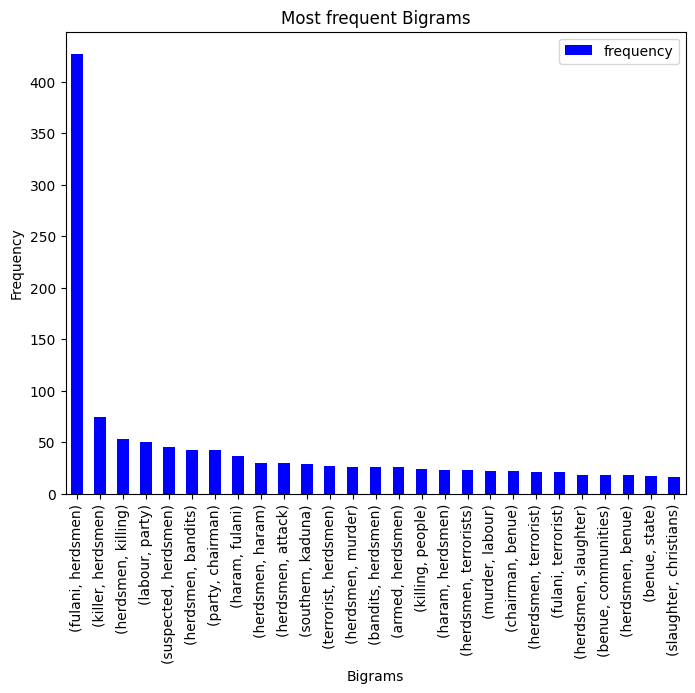

In [65]:
df_top_30 = pd.DataFrame(list(top_30_dict.items()), columns=['bigram', 'frequency'])

# Sort the dataframe by frequency in descending order
df_top_30 = df_top_30.sort_values('frequency', ascending=False)

# Plot a barchart of the top 10 bigrams
fig, ax = plt.subplots(figsize=(8, 6))
df_top_30.head(27).plot(kind='bar', x='bigram', y='frequency', ax=ax, color='blue')
plt.title('Most frequent Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Plotting the wordcloud

In [66]:
top_30_dict

{('fulani', 'herdsmen'): 427,
 ('killer', 'herdsmen'): 74,
 ('herdsmen', 'killing'): 53,
 ('labour', 'party'): 50,
 ('suspected', 'herdsmen'): 45,
 ('herdsmen', 'bandits'): 42,
 ('party', 'chairman'): 42,
 ('haram', 'fulani'): 37,
 ('herdsmen', 'haram'): 30,
 ('herdsmen', 'attack'): 30,
 ('southern', 'kaduna'): 29,
 ('terrorist', 'herdsmen'): 27,
 ('armed', 'herdsmen'): 26,
 ('bandits', 'herdsmen'): 26,
 ('herdsmen', 'murder'): 26,
 ('killing', 'people'): 24,
 ('haram', 'herdsmen'): 23,
 ('herdsmen', 'terrorists'): 23,
 ('murder', 'labour'): 22,
 ('chairman', 'benue'): 22,
 ('herdsmen', 'terrorist'): 21,
 ('fulani', 'terrorist'): 21,
 ('herdsmen', 'slaughter'): 18,
 ('benue', 'communities'): 18,
 ('herdsmen', 'benue'): 18,
 ('benue', 'state'): 17,
 ('slaughter', 'christians'): 16}

In [70]:
# Create a dictionary of bigrams and their frequencies
bigram_dict = {}
for bigram, freq in my_list:
    bigram_dict[' '.join(bigram)] = freq

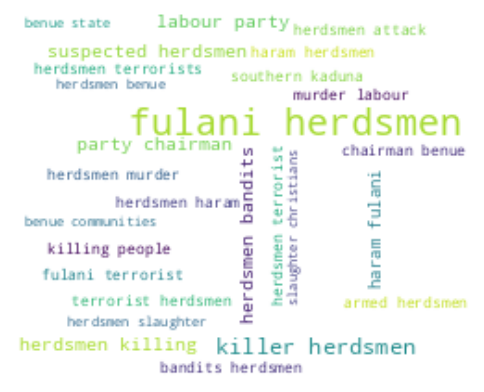

In [71]:

# load an image to use as a mask for the wordcloud
mask = np.array(Image.open("/content/drive/MyDrive/yinka/map of nig.png"))


# create a WordCloud object
wc = WordCloud(background_color="white", max_words=2000, mask=mask,contour_width=3, contour_color='steelblue')

# generate the word cloud from your data
wc.generate_from_frequencies(bigram_dict)

# plot the wordcloud
plt.figure(figsize=(6,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Topic modelling

In [81]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# assuming your dataframe is called "df" and the text column is called "text"
corpus = df['tweet'].values.tolist()

# create count vectorizer object
cv = CountVectorizer(stop_words='english')
cv_fit = cv.fit_transform(corpus)

# create LDA object
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(cv_fit)

# get topics and their top 10 words
feature_names = cv.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))



Topic #0:
herdsmen benue party labour chairman state murder x99s suspected killed
Topic #1:
herdsmen fulani nigeria people buhari killing military yoruba terrorists terrorist
Topic #2:
herdsmen farmers killed people clash taraba bandit lives th claims
Topic #3:
herdsmen fulani killing people benue haram terrorists kaduna southern bandits
Topic #4:
x98 x82 herdsmen x8f x92 nigeria xe5 government x94 buhari
Topic #5:
herdsmen fulani bandits haram nigeria terrorist people killer government attacks
Topic #6:
herdsmen people continue years nigeria murdered suffer haram nigerian money
Topic #7:
herdsmen fulani killer terrorist bandits buhari x87 haram terrorists bokoharam
Topic #8:
nigeria herdsmen nigerians president sudan farmers called terrorists security buhari
Topic #9:
herdsmen christians slaughter pastor nigeria kills killed iswap killings buhari
